# maxcut graph

Given an undirected graph G(V, E) with a vertex set V and an edge set E, 
the Max Cut problem seeks to partition V into two sets such that the number 
of edges between the two sets (considered to be severed by the cut), is a large as possible. 

Maximize $ y = \sum_{i,j \in E} (x_i + x_j + 2.x_1.x_2) $ 

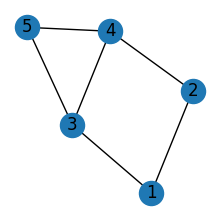

In [24]:
import networkx as nx 
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(2, 2))

G = nx.Graph()

nodes = [1,2,3,4,5]
edges = [(1,2),(1,3),(2,4),(3,4),(3,5),(4,5)]

linear = [0]*len(nodes)

G.add_nodes_from(nodes)
for s,e in edges:
    G.add_edge(s,e)
    linear[s-1]+=1
    linear[e-1]+=1

nx.draw(G, with_labels=True)

In [11]:
from qiskit_optimization import QuadraticProgram
from qiskit import BasicAer
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.utils import QuantumInstance
from qiskit.primitives import Sampler
from qiskit.algorithms.minimum_eigensolvers import QAOA
from qiskit_algorithms.optimizers import COBYLA

In [25]:
mod = QuadraticProgram("maxcut")
[mod.binary_var("x"+str(i+1)) for i in range(5)]
quadratic = {}

for s, e in edges:
    quadratic[("x"+str(s), "x"+str(e))] = -2

mod.maximize(linear=linear, quadratic=quadratic)
print(mod.prettyprint())

Problem name: maxcut

Maximize
  -2*x1*x2 - 2*x1*x3 - 2*x2*x4 - 2*x3*x4 - 2*x3*x5 - 2*x4*x5 + 2*x1 + 2*x2
  + 3*x3 + 3*x4 + 2*x5

Subject to
  No constraints

  Binary variables (5)
    x1 x2 x3 x4 x5



In [26]:
quantum_instance = Sampler()
qaoa_mes = QAOA(quantum_instance, COBYLA(), reps=2)
qaoa = MinimumEigenOptimizer(qaoa_mes)

qaoa_result = qaoa.solve(mod)
[qaoa_result.x], [qaoa_result.fval]

([array([0., 1., 1., 0., 0.])], [5.0])